##  Internship Project: Sentiment Analysis on Tweets

**Name:** Kritik Mahesh  
**Institution:** Manipal Academy of Higher Education, Dubai  
**Platform:** Google Colab  
**Libraries Used:** NLTK, Scikit-learn, Seaborn, WordCloud  

---

###  Project Objective  
To develop a machine learning model that classifies tweets as **Positive** or **Negative** based on their sentiment. This project demonstrates how text preprocessing, vectorization, and logistic regression can be used to analyze social media sentiment effectively.

---

###  This notebook includes:
-  Importing and analyzing the tweet dataset  
-  Text cleaning: removing mentions, URLs, hashtags, emojis, etc.  
-  Exploratory Data Analysis (EDA) using **Seaborn** and **WordCloud**  
-  Sentiment label distribution visualization  
-  TF-IDF vectorization of cleaned text  
-  Training a **Logistic Regression** classifier  
-  Evaluation using **accuracy**, **precision**, **recall**, and **F1-score**  
- A live sentiment prediction function for user input  

---

 ### *Model Accuracy Achieved: ~76.6%*


In [98]:
#Install & Import

!pip install emoji

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
#Loading Dataset
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv.zip', encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = df[['sentiment', 'text']]
df['sentiment'] = df['sentiment'].replace({0: 0, 4: 1})  # 0 = negative, 1 = positive
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [100]:
#Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,sentiment,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david carr...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [101]:
# Emoji sentiment
def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

df['emojis'] = df['text'].apply(extract_emojis)

# Tweet length
df['tweet_len'] = df['clean_text'].apply(lambda x: len(x.split()))

# Unique words count
df['unique_words'] = df['clean_text'].apply(lambda x: len(set(x.split())))

# Add a column for uppercase words (indicating strong emotion)
df['uppercase_words'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))


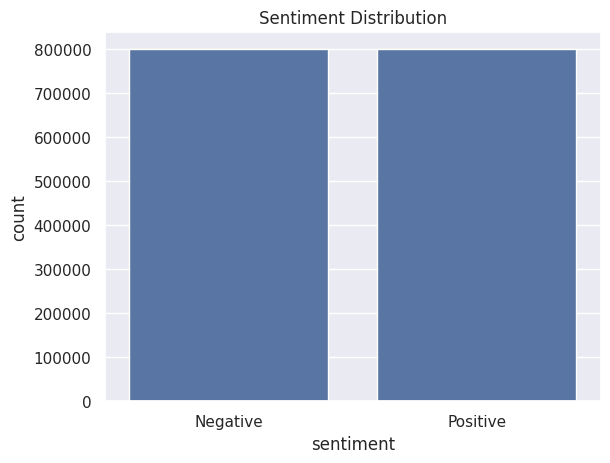

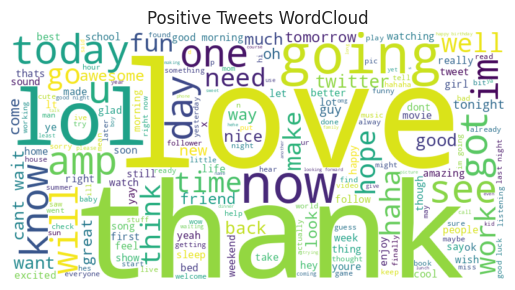

In [102]:
#Visualization
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xticks([0,1], ['Negative', 'Positive'])
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['sentiment'] == 1]['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud')
plt.show()


In [103]:
#Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
#Model Training

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.765821875

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



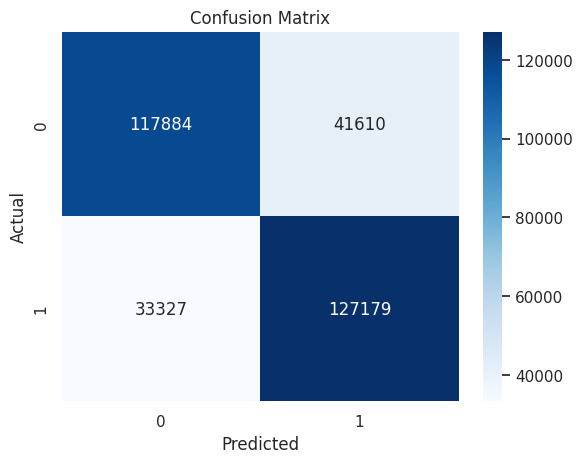

In [105]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##  Real-Time Sentiment Prediction (User Input)

This section allows users to input their own tweets and receive an instant sentiment prediction. The model uses the trained Logistic Regression classifier and a pre-fitted TF-IDF vectorizer to analyze the sentiment of the provided tweet in real time.

Features:
- Cleans and vectorizes user input using the same pipeline as training data
- Predicts sentiment as **Positive 😊** or **Negative 😞**
- Runs in an interactive loop until the user types `exit`

 **Try it yourself below!**

 **\ ^ . ^ /**

In [109]:
def predict_sentiment(tweet):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Positive 😊" if pred == 1 else "Negative 😞"

# Interactive Loop
while True:
    user_input = input(" Enter a tweet to analyze sentiment (or type 'exit' to stop):\n> ")
    if user_input.lower() == 'exit':
        print("👋 Exiting the sentiment predictor. Have a great day!")
        break
    sentiment = predict_sentiment(user_input)
    print(f" Sentiment Prediction: {sentiment}\n")


 Enter a tweet to analyze sentiment (or type 'exit' to stop):
> This Product is amazing !
 Sentiment Prediction: Positive 😊

 Enter a tweet to analyze sentiment (or type 'exit' to stop):
> This is the worst customer service I’ve ever experienced
 Sentiment Prediction: Negative 😞

 Enter a tweet to analyze sentiment (or type 'exit' to stop):
> Totally disappointed by the movie. What a waste of time.
 Sentiment Prediction: Negative 😞

 Enter a tweet to analyze sentiment (or type 'exit' to stop):
> exit
👋 Exiting the sentiment predictor. Have a great day!


## End